In [1]:
%matplotlib inline
from ipywidgets import *
import numpy as np
import os
import matplotlib.pyplot as plt
from operator import itemgetter

In [2]:
# Get recorded results
relevant_path = "./record"
included_extensions = ['svhn2mnist']
file_names = [fn for fn in os.listdir(relevant_path) if any(fn.startswith(ext) for ext in included_extensions)]
grouped_files = []
i = 0 
while i < len(file_names):
    j = i + 1
    while j < len(file_names):
        if file_names[i][0:40] == file_names[j][0:40]:
            grouped_files.append([file_names[i], file_names[j]])
        j+= 1
    i += 1
i = 0
while i < len(grouped_files):
    grouped_files[i] = sorted(grouped_files[i])
    i += 1 

In [3]:
# Get commands from command files
pattern = 'commands'
matching_files = [f for f in os.listdir(".") if pattern in f]
param = []
for f in matching_files:
    for line in open(f).readlines():
        param.append(line)

In [4]:
# Get a list of lists, each list in the list is of for [command, [loss_record_file, accuracy_record_file]]
data = []
save_results = []
for line in param:
    run = (str.split(line)[-1]).replace('\"', '')
    for fp in grouped_files :
        if run in fp[0]:
            data.append([line, fp])

In [5]:
for datum in data:
    title = datum[0]
    seriesX = []
    seriesY = []
    seriesXLoss = []
    seriesYLoss = []
    for line in (open("./record/"+ datum[1][1])).readlines():
        seriesX.append(float(str.split(line)[1]))
        seriesY.append(float(str.split(line)[-1].replace("%",'')))
    for line in (open("./record/"+ datum[1][0])).readlines():
        if "[batch-idx: 400]" in line:
            seriesXLoss.append(float(str.split(line)[2]))
            seriesYLoss.append(float(str.split(line)[6].replace(",",'')))
    save_results.append([str.split(datum[0])[11], str.split(datum[0])[3], str.split(datum[0])[5],seriesX, seriesY, seriesXLoss, seriesYLoss])
save_results = sorted(save_results, key=itemgetter(1,2,0))
grouped_results = []
i = 0 
while i < len(save_results):
    j = i + 1
    while j < len(save_results):
        if save_results[i][1] == save_results[j][1] and save_results[i][2] == save_results[j][2]:
            grouped_results.append([save_results[i], save_results[j]])
        j+= 1
    i += 1

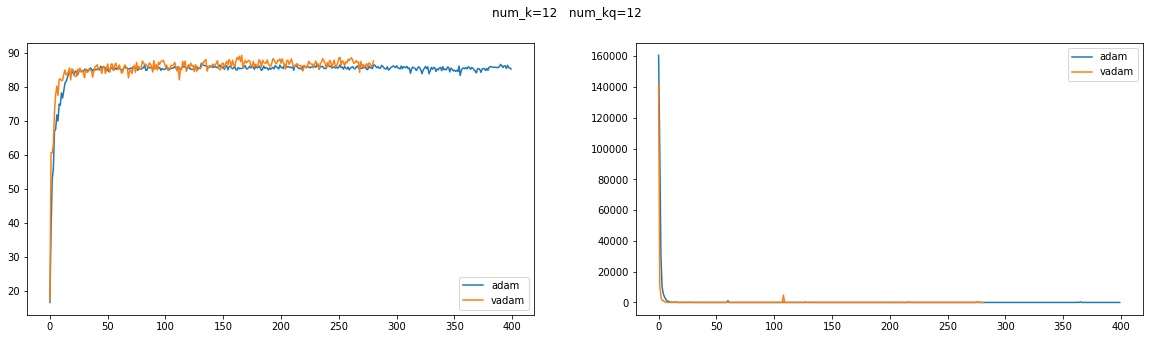

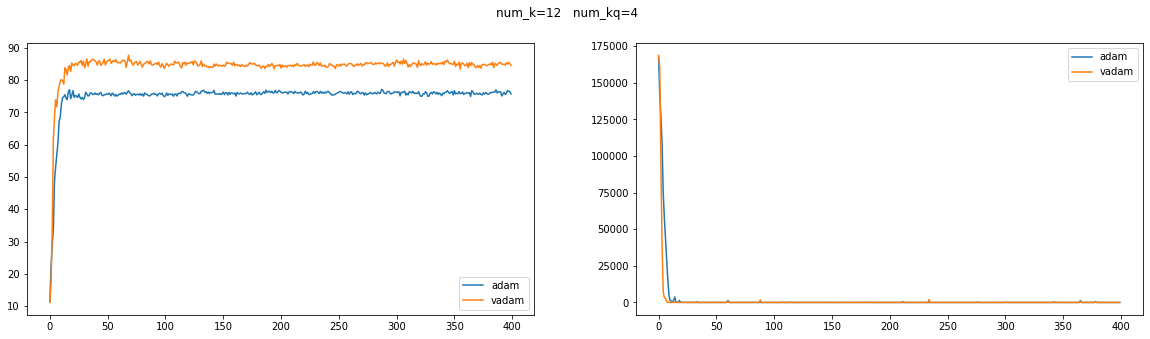

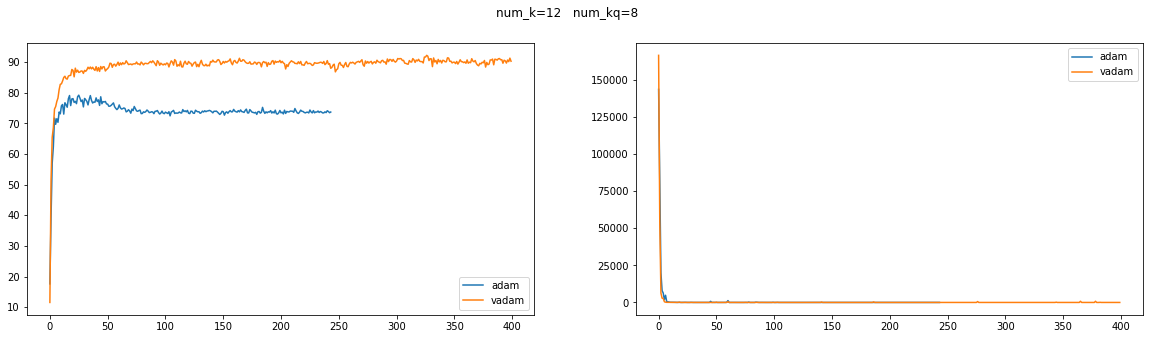

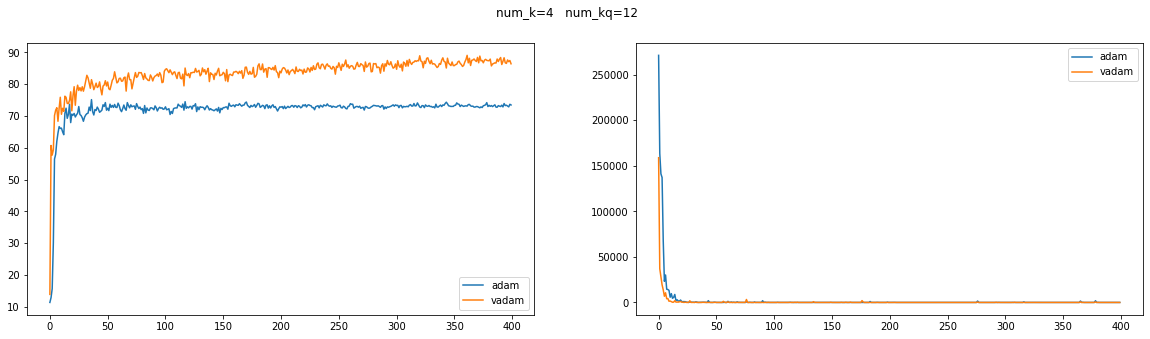

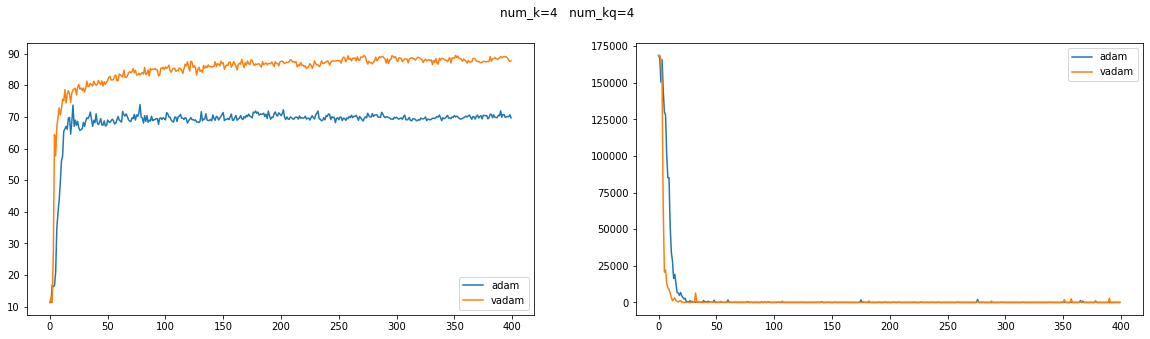

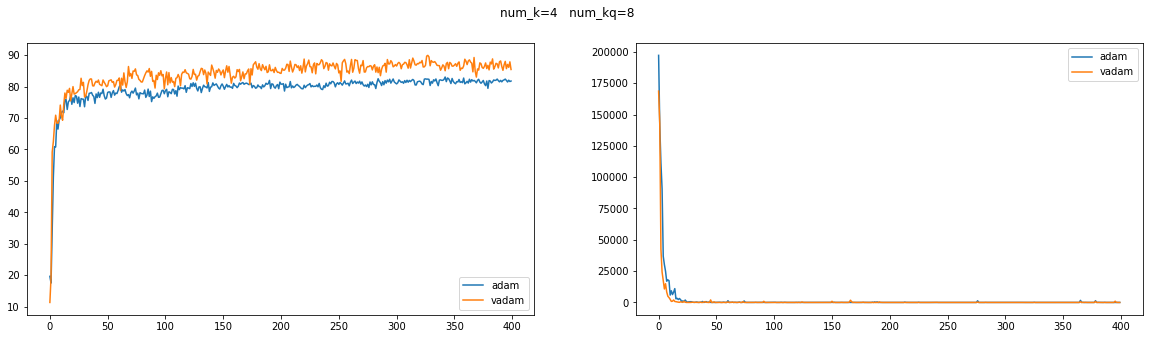

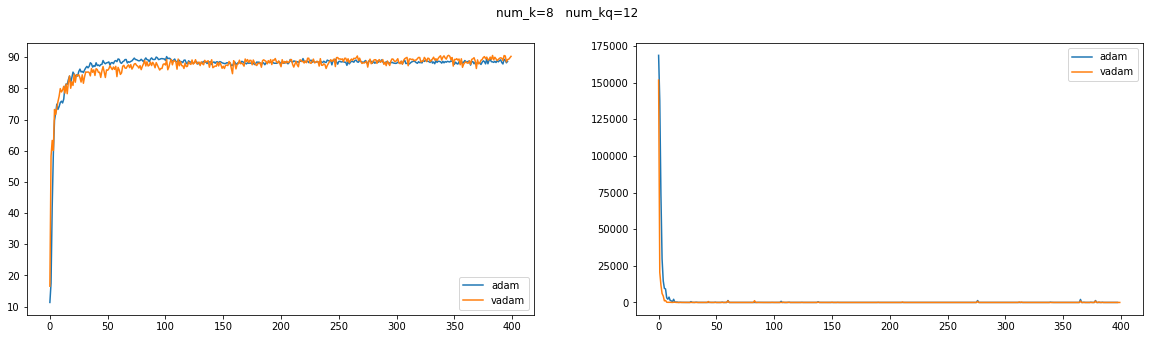

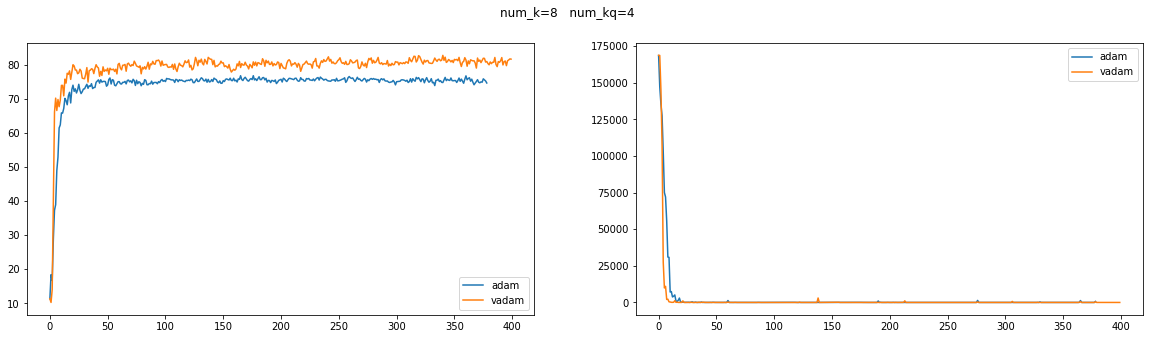

In [6]:
for results in grouped_results:
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))    
    ax1.plot(results[0][3], results[0][4], label=results[0][0])
    fig.suptitle("num_k="+ str(results[0][1]) + "   num_kq="+ str(results[0][2]))
    ax1.plot(results[1][3], results[1][4], label=results[1][0])
    ax1.legend()
    ax2.plot(results[0][5], results[0][6], label=results[0][0])
    ax2.plot(results[1][5], results[1][6], label=results[1][0])
    ax2.legend()
    plt.show()

In [ ]:
%qtconsole